# Plot

In [1]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load your data
data = pd.read_csv('xa.s12.00.mhz.1971-11-24HR00_evid00156.csv')

In [3]:
# Step 2: Define a low-pass Butterworth filter
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyquist  # Normalize the cutoff frequency
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

In [4]:
# Step 3: Calculate the sampling frequency based on the 'time_rel(sec)' column
time_diff = np.diff(data['time_rel(sec)'])
fs = 1 / np.mean(time_diff)  # Sampling frequency based on the time intervals

In [5]:
# Step 4: Apply the low-pass filter to the 'velocity(m/s)' column
cutoff_frequency = 0.1  # Define the cutoff frequency for the filter
filtered_velocity = lowpass_filter(data['velocity(m/s)'], cutoff=cutoff_frequency, fs=fs)

In [6]:
# Step 5: Calculate the noise by subtracting the filtered data from the original data
noise = data['velocity(m/s)'] - filtered_velocity

In [7]:
# Step 6: Create separate DataFrames for the main signal and the noise
main_data_wave = data.copy()
main_data_wave['velocity(m/s)'] = filtered_velocity

noise_wave = data.copy()
noise_wave['velocity(m/s)'] = noise

In [8]:
# Step 7: Save the separated waves to CSV files
main_data_wave.to_csv('main_data_wave.csv', index=False)
noise_wave.to_csv('noise_wave.csv', index=False)

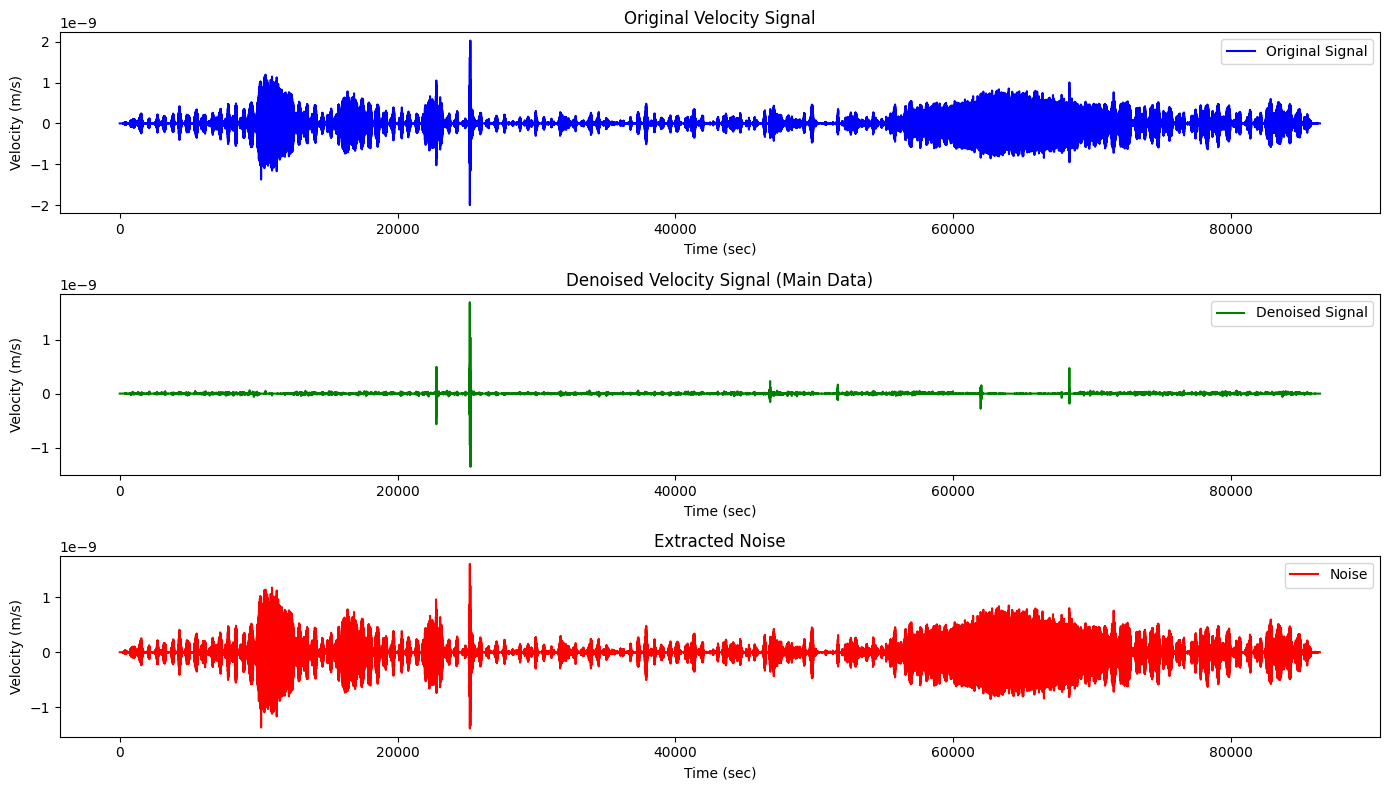

Denoising and plotting complete!


In [9]:
# Step 8: Plot the original signal, filtered signal, and noise
plt.figure(figsize=(14, 8))

# Plot Original Data
plt.subplot(3, 1, 1)
plt.plot(data['time_rel(sec)'], data['velocity(m/s)'], label='Original Signal', color='blue')
plt.title('Original Velocity Signal')
plt.xlabel('Time (sec)')
plt.ylabel('Velocity (m/s)')
plt.legend()

# Plot Denoised (Filtered) Data
plt.subplot(3, 1, 2)
plt.plot(main_data_wave['time_rel(sec)'], main_data_wave['velocity(m/s)'], label='Denoised Signal', color='green')
plt.title('Denoised Velocity Signal (Main Data)')
plt.xlabel('Time (sec)')
plt.ylabel('Velocity (m/s)')
plt.legend()

# Plot Noise
plt.subplot(3, 1, 3)
plt.plot(noise_wave['time_rel(sec)'], noise_wave['velocity(m/s)'], label='Noise', color='red')
plt.title('Extracted Noise')
plt.xlabel('Time (sec)')
plt.ylabel('Velocity (m/s)')
plt.legend()

plt.tight_layout()
plt.show()

print("Denoising and plotting complete!")
